In [1]:
from sklearn.neighbors import BallTree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random
from tqdm import tqdm_notebook

tetta = np.array(range(10,71))
w = np.exp(-2*np.log(tetta/54)**2)/tetta

data = pd.read_csv("borovkova/database_txt/database.txt",delimiter ="\t",header=-1)#ненормированны
data.iloc[:,4:] = data.values[:,4:]*w

data_test = pd.read_csv("borovkova/database_txt/test_1000.txt",delimiter ="\t",header=-1)#нормированны

data_exp = pd.read_csv("borovkova/database_txt/experiment_1000.txt",delimiter ="\t",header=-1)#нормированны

In [2]:
data.shape

(493739, 65)

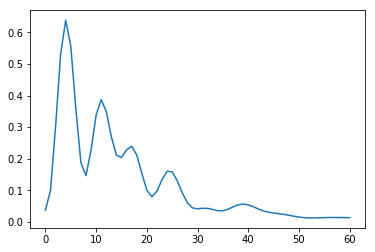

In [5]:
plt.plot(data.values[2][4:])
plt.show()

In [4]:
def generate_random(data, noise_rank = 0.1):
    r = np.random.randint(data.shape[0])
    return data.values[r] + np.random.randn(data.shape[1])*noise_rank

In [19]:
def calc_time_for_samples(tree, test_data, deep = 1):
    time.clock()
    summary_time = 0
    start_time = time.clock()
    try:
        dist, ind = tree.query(test_data, k=deep)
    except:
        print("!",end="")
        pass
    summary_time += time.clock() - start_time
    return summary_time

In [28]:
ref_points = np.linspace(50000,500000,10).astype(int)
clever_res = []
stupid_res = []
for len_of_data in tqdm_notebook(ref_points):
    clever_tree = BallTree(data.iloc[:len_of_data,4:], leaf_size=1) 
    stupid_tree = BallTree(data.iloc[:len_of_data,4:], leaf_size=data.shape[0])
    clever_res.append(calc_time_for_samples(clever_tree, data_exp[:100]))
    stupid_res.append(calc_time_for_samples(stupid_tree, data_exp[:100]))

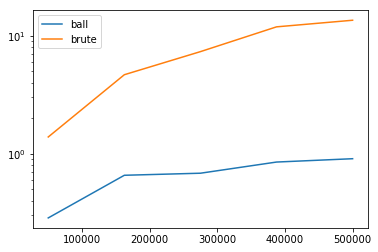

In [21]:
plt.plot(ref_points, clever_res)
plt.plot(ref_points, stupid_res)
plt.legend(["ball", "brute"])
plt.yscale('log')
plt.show()

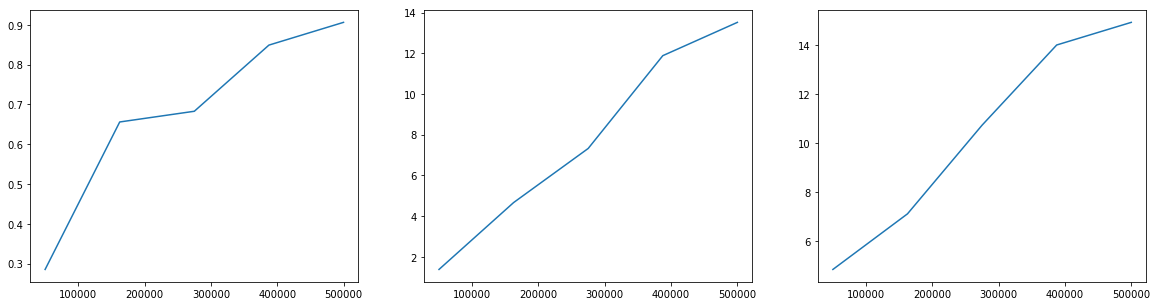

In [22]:
f, axarr = plt.subplots(1,3, sharex=True,figsize=(20,5))
axarr[0].plot(ref_points, clever_res)
axarr[1].plot(ref_points, stupid_res)
axarr[2].plot(ref_points, np.array(stupid_res)/np.array(clever_res))
plt.show()

In [ ]:
ref_points = np.linspace(50000,500000,10).astype(int)
clever_res = []
stupid_res = []
for len_of_data in tqdm_notebook(ref_points):
    clever_tree = BallTree(data.iloc[:len_of_data,4:], leaf_size=1) 
    stupid_tree = BallTree(data.iloc[:len_of_data,4:], leaf_size=data.shape[0])
    clever_res.append(calc_time_for_samples(clever_tree, data_test.iloc[:100,4:]))
    stupid_res.append(calc_time_for_samples(stupid_tree, data_test.iloc[:100,4:]))

In [35]:
clever_tree.get_tree_stats()

(875900, 54458, 930258)

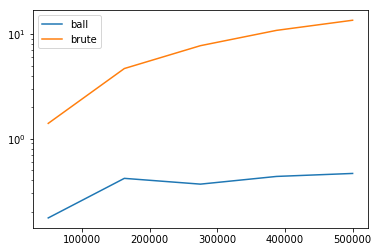

In [26]:
plt.plot(ref_points, clever_res)
plt.plot(ref_points, stupid_res)
plt.legend(["ball", "brute"])
plt.yscale('log')
plt.show()

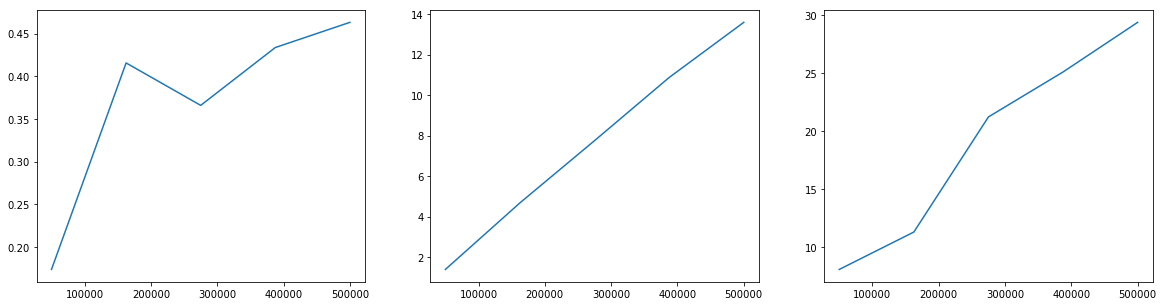

In [27]:
f, axarr = plt.subplots(1,3, sharex=True,figsize=(20,5))
axarr[0].plot(ref_points, clever_res)
axarr[1].plot(ref_points, stupid_res)
axarr[2].plot(ref_points, np.array(stupid_res)/np.array(clever_res))
plt.show()

Анализ скорости поиска для экспериментальных и для тестовых данных(скорость различается в 2 раза).

Стоит заметить, что скорость растет (предположительно линейно) с размером данных